# Step 1: Load SQLite database

In [1]:
import sqlite3

# Connect (database automatically created if not exists)
conn = sqlite3.connect("sales_data.db")

print("Database connected successfully!")


Database connected successfully!


# Step 2: Create table & insert more sample data

In [2]:
cur = conn.cursor()

# Create sales table
cur.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    order_date TEXT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# More sample data inserted
sample_data = [
    ("2025-11-01", "Notebook", 10, 2.5),
    ("2025-11-02", "Pen", 50, 0.5),
    ("2025-11-02", "Notebook", 5, 2.5),
    ("2025-11-03", "Pencil", 30, 0.2),
    ("2025-11-04", "Pen", 20, 0.5),
    ("2025-11-05", "Eraser", 15, 0.3),
    ("2025-11-06", "Notebook", 8, 2.5),
    ("2025-11-07", "Marker", 12, 1.0),
    ("2025-11-08", "Highlighter", 10, 1.5),
    ("2025-11-09", "Notebook", 7, 2.5)
]

# Clear table before inserting (optional)
cur.execute("DELETE FROM sales;")
cur.executemany("INSERT INTO sales (order_date, product, quantity, price) VALUES (?, ?, ?, ?)", sample_data)
conn.commit()

print("Table created and sample data inserted successfully!")


Table created and sample data inserted successfully!


# Step 3: Run basic SQL query

In [3]:
query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""


# Step 4: Load SQL results into Pandas

In [4]:
import pandas as pd

df = pd.read_sql_query(query, conn)


In [34]:
df['revenue'] = df['price'] * df['quantity']


# Step 5: Print results

In [35]:
print(df)


   id  order_date      product  quantity  price  revenue
0  11  2025-11-01     Notebook        10    2.5     25.0
1  12  2025-11-02          Pen        50    0.5     25.0
2  13  2025-11-02     Notebook         5    2.5     12.5
3  14  2025-11-03       Pencil        30    0.2      6.0
4  15  2025-11-04          Pen        20    0.5     10.0
5  16  2025-11-05       Eraser        15    0.3      4.5
6  17  2025-11-06     Notebook         8    2.5     20.0
7  18  2025-11-07       Marker        12    1.0     12.0
8  19  2025-11-08  Highlighter        10    1.5     15.0
9  20  2025-11-09     Notebook         7    2.5     17.5


# Step 6: Visulation

### 1. Bar chart

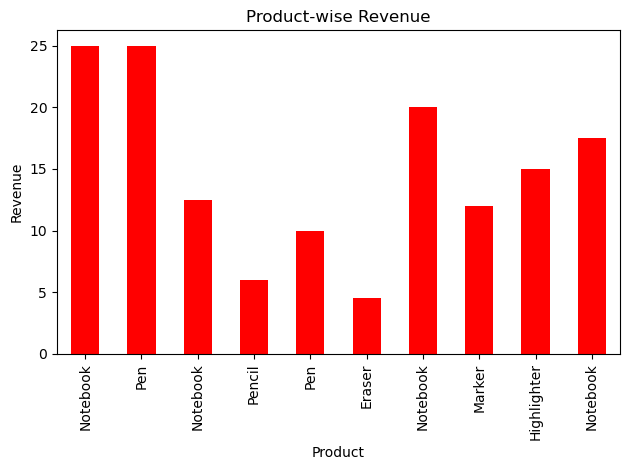

In [50]:
import matplotlib.pyplot as plt

df.plot(kind='bar', x='product', y='revenue', legend=False,color='red')
plt.title("Product-wise Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()

# Save chart as PNG
plt.savefig("sales_chart.png")

plt.show()


### 2. Pie Chart

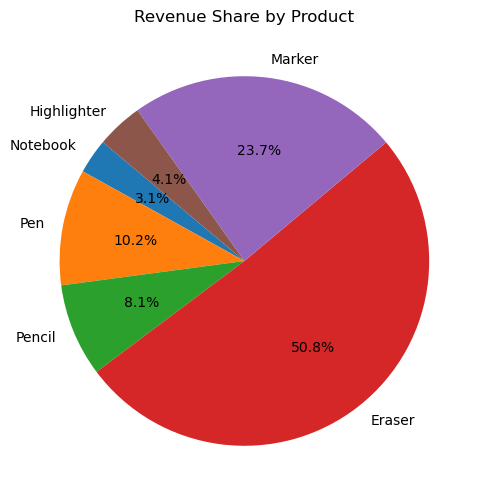

In [51]:
plt.figure(figsize=(6,6))
plt.pie(
    df.groupby('product')['revenue'].sum(),
    labels=df['product'].unique(),
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Revenue Share by Product")
plt.savefig("sales_chart_horizontal.png")
plt.show()



### 3. Line Chart

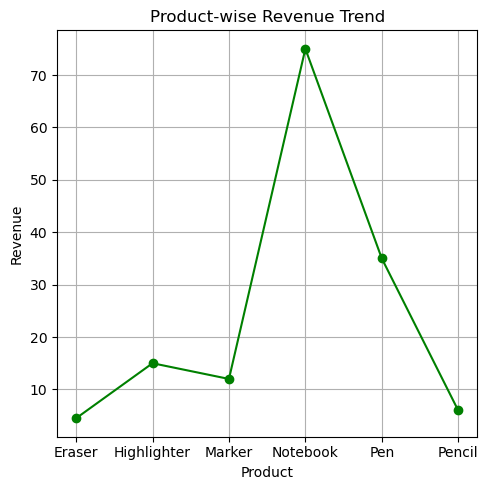

In [52]:
plt.figure(figsize=(5,5))
df.groupby('product')['revenue'].sum().plot(kind='line', marker='o', linestyle='-', color='green')
plt.title("Product-wise Revenue Trend")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.savefig("sales_chart_horizontal.png")
plt.show()


### 4. Scatter Plot

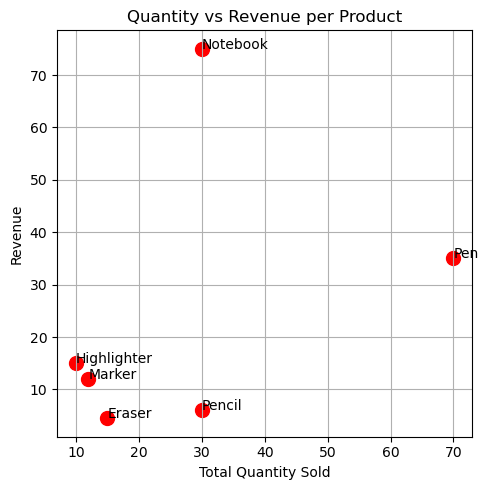

In [53]:
plt.figure(figsize=(5,5))
df_summary = df.groupby('product').agg({'quantity':'sum','revenue':'sum'}).reset_index()

plt.scatter(df_summary['quantity'], df_summary['revenue'], color='red', s=100)
for i, txt in enumerate(df_summary['product']):
    plt.annotate(txt, (df_summary['quantity'][i], df_summary['revenue'][i]))
plt.title("Quantity vs Revenue per Product")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.savefig("sales_chart_horizontal.png")
plt.show()


### 5.Histogram

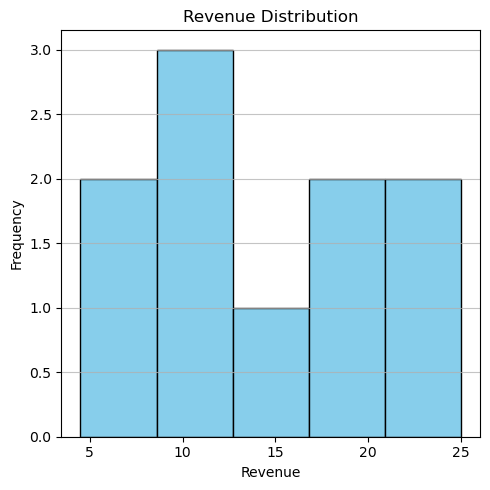

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.hist(df['revenue'], bins=5, color='skyblue', edgecolor='black')
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.savefig("sales_chart_horizontal.png")
plt.show()


### 5.1 Histogram

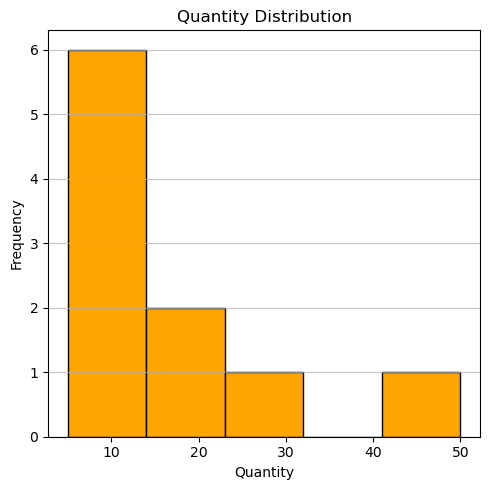

In [55]:
plt.figure(figsize=(5,5))
plt.hist(df['quantity'], bins=5, color='orange', edgecolor='black')
plt.title("Quantity Distribution")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.savefig("sales_chart_horizontal.png")
plt.show()


# Step 7 : Save the Chart

In [56]:
# Save the chart as PNG
plt.savefig("sales_chart.png")

print("Chart saved as sales_chart.png")


Chart saved as sales_chart.png


<Figure size 640x480 with 0 Axes>

# Step 8 : Close Connection

In [8]:
# Close the SQLite connection
conn.close()
print("Database connection closed.")


Database connection closed.
